In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [7]:
x1, x2 = sp.symbols('x1 x2')
rx = sp.Matrix([x1, 10*x1/(x1 + 0.1) + 2*x2**2])
rx_func = sp.lambdify((x1, x2), rx, 'numpy')
iters = Newtonsys(rx, [3,1], (x1, x2), 100)

Converged at k = 19


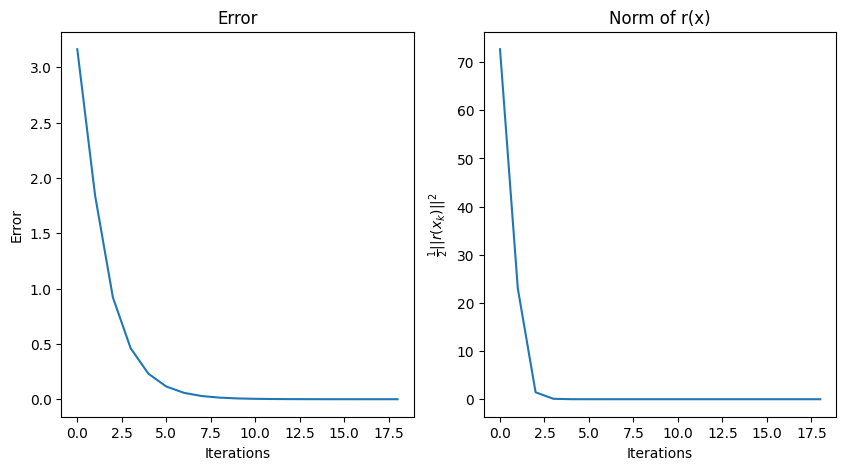

In [59]:
# Plot the iterations according to the optimal [0,0]

errors = [np.linalg.norm(iters[:,i]) for i in range(iters.shape[1])]
rxk = [1/2*(np.linalg.norm(rx_func(iters[0,i], iters[1,i]))**2) for i in range(iters.shape[1])]

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(range(iters.shape[1]), errors)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error")
plt.subplot(122)
plt.plot(range(iters.shape[1]), rxk)
plt.xlabel("Iterations")
plt.ylabel("$\\frac{1}{2} ||r(x_k)||^2$")
plt.title("Norm of r(x)")
plt.show()

In [56]:
xk2 = [iters[1,i]/iters[1,i-1] for i in range(1, iters.shape[1])]

In [57]:
print("The solutions in each iteration can be seen: ")
for i in range(19):
    print(f"{i+1}: {iters[:,i]}")
# It seems to converge towards the actual solution

errors = [np.max(np.array([0,0]) - np.array(iters[:,k]))
          for k in range(19)]

print("\n The errors are as follows")
for i, error in enumerate(errors):
    print(f"{i+1}: {error}")

print("\n The ratio between x2k+1 and x2k is as follows")
for i, x in enumerate(xk2):
    print(f"{i+1}: {x}")

The solutions in each iteration can be seen: 
1: [3. 1.]
2: [ 0.         -1.84131113]
3: [ 0.         -0.92065557]
4: [ 0.         -0.46032778]
5: [ 0.         -0.23016389]
6: [ 0.         -0.11508195]
7: [ 0.         -0.05754097]
8: [ 0.         -0.02877049]
9: [ 0.         -0.01438524]
10: [ 0.         -0.00719262]
11: [ 0.         -0.00359631]
12: [ 0.         -0.00179816]
13: [ 0.         -0.00089908]
14: [ 0.         -0.00044954]
15: [ 0.         -0.00022477]
16: [ 0.         -0.00011238]
17: [ 0.00000000e+00 -5.61923564e-05]
18: [ 0.00000000e+00 -2.80961782e-05]
19: [ 0.00000000e+00 -1.40480891e-05]

 The errors are as follows
1: -1.0
2: 1.841311134235172
3: 0.920655567117586
4: 0.460327783558793
5: 0.2301638917793965
6: 0.11508194588969825
7: 0.057540972944849125
8: 0.028770486472424563
9: 0.014385243236212281
10: 0.007192621618106141
11: 0.0035963108090530703
12: 0.0017981554045265352
13: 0.0008990777022632676
14: 0.0004495388511316338
15: 0.0002247694255658169
16: 0.0001123847